In [105]:
%run ../utils.ipynb

In [106]:
from threadpoolctl import __version__

In [107]:
__version__

'3.2.0'

In [108]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
data_dir = f"{project_dir}data\\matchup_player_data\\"

In [110]:
df = pd.read_csv(data_dir + 'weekly_scoring_patterns.csv')

In [111]:
df.set_index('season_week', inplace=True)

In [113]:
df['W/R/T position'].unique()

array(['WR', nan, 'RB', 'TE', 'WR,RB', 'RB,TE'], dtype=object)

In [76]:
cols = [col for col in df.columns if 'percentage' in col]

In [77]:
cols = ['manager'] + cols

In [78]:
df = df[df['manager'] != 'Big Rick']

In [79]:
df = df[cols]

In [80]:
df.drop(['BN_points_percentage'], axis = 1, inplace = True)

In [81]:
X_mean = df.groupby('manager').agg(['mean'])

In [82]:
X_mean

,WR_points_percentage,RB_points_percentage,QB_points_percentage,TE_points_percentage,W/R/T_points_percentage,DEF_points_percentage
,mean,mean,mean,mean,mean,mean
manager,,,,,,
Buddy,0.230436,0.242643,0.168466,0.085253,0.089838,0.118037
Eric,0.272975,0.185834,0.151068,0.109758,0.084425,0.125523
Frags,0.250780,0.231504,0.166315,0.077207,0.084506,0.121195
Jake,0.250246,0.216538,0.162126,0.071749,0.105093,0.129436
Jones,0.228038,0.236771,0.172140,0.067521,0.093628,0.135000
Kyle,0.250599,0.234200,0.154730,0.081378,0.088313,0.129081
Lauren,0.227444,0.230276,0.165465,0.077783,0.094459,0.136592
Michael,0.261549,0.222997,0.159032,0.076210,0.082368,0.136428


In [83]:
sc = StandardScaler()
X_mean_sc = sc.fit_transform(X_mean)

C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [84]:
inertia = []
for n in range(1,11):
    km = KMeans(n_clusters=n, random_state=2024)
    km.fit(X_mean_sc)
    inertia.append(km.inertia_)

C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\clust

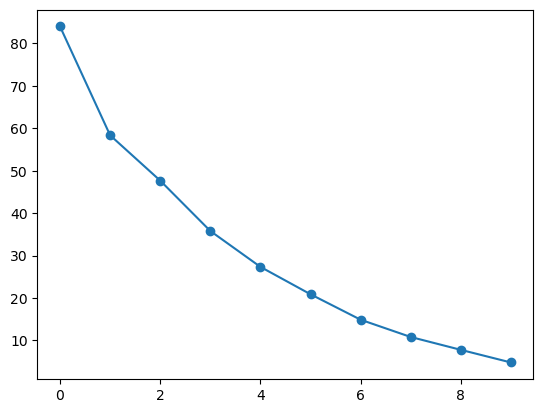

In [85]:
plt.plot(inertia, marker='o')

In [86]:
    km = KMeans(n_clusters=5, random_state=2024)
    km.fit(X_mean_sc)

C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=2024)

In [87]:
km.labels_

array([0, 3, 4, 2, 2, 4, 2, 4, 1, 4, 1, 2, 0, 2])

In [88]:
X_mean['cluster'] = km.labels_

In [89]:
X.sort_values('cluster')

,WR_points_percentage,RB_points_percentage,QB_points_percentage,TE_points_percentage,W/R/T_points_percentage,DEF_points_percentage,cluster
,mean,mean,mean,mean,mean,mean,
manager,,,,,,,
Buddy,0.230436,0.242643,0.168466,0.085253,0.089838,0.118037,0
Ricky,0.224932,0.244893,0.168056,0.083119,0.096277,0.120757,0
Nate,0.242919,0.212061,0.157038,0.096226,0.089507,0.140233,1
Pat,0.250352,0.189140,0.180997,0.091159,0.084286,0.133621,1
Jake,0.250246,0.216538,0.162126,0.071749,0.105093,0.129436,2
Jones,0.228038,0.236771,0.172140,0.067521,0.093628,0.135000,2
Lauren,0.227444,0.230276,0.165465,0.077783,0.094459,0.136592,2
Peter,0.232917,0.237926,0.153129,0.079043,0.100128,0.129623,2


In [90]:
# sns.heatmap(X.drop('cluster', axis=1), cmap='coolwarm', annot=True)

In [91]:
sc_df = pd.DataFrame(X_mean_sc)
sc_df.set_index(X.index, inplace=True)
sc_df['cluster'] = km.labels_

In [92]:
sc_df.rename({0: 'WR_average_pts_z',
             1: 'RB_average_pts_z',
             2: 'QB_average_pts_z',
             3: 'TE_average_pts_z',
             4: 'W/R/T_average_pts_z',
             5: 'DEF_average_pts_z'}, axis =1, inplace=True)

In [93]:
sc_df = sc_df.sort_values('cluster')

In [94]:
sc_df

,WR_average_pts_z,RB_average_pts_z,QB_average_pts_z,TE_average_pts_z,W/R/T_average_pts_z,DEF_average_pts_z,cluster
manager,,,,,,,
Buddy,-0.996886,0.951080,0.670148,0.373300,-0.225216,-1.835095,0
Ricky,-1.387706,1.071829,0.620624,0.189124,0.765328,-1.428481,0
Nate,-0.110665,-0.689592,-0.712735,1.320296,-0.276139,1.482400,1
Pat,0.417136,-1.919311,2.186620,0.882945,-1.079354,0.494186,1
Jake,0.409571,-0.449430,-0.097031,-0.792113,2.121664,-0.131250,2
Jones,-1.167131,0.636045,1.114739,-1.157024,0.357792,0.700320,2
Lauren,-1.209308,0.287626,0.307005,-0.271401,0.485693,0.938322,2
Peter,-0.820722,0.698041,-1.185739,-0.162623,1.357832,-0.103332,2
Tim,1.079916,-0.496998,0.688116,-1.535511,0.924879,1.229564,2


[2024-01-15 13:42:21,665 DEBUG] [matplotlib.colorbar.colorbar._get_ticker_locator_formatter] locator: <matplotlib.ticker.AutoLocator object at 0x00000212192C5350>
[2024-01-15 13:42:21,665 DEBUG] [matplotlib.colorbar.colorbar._get_ticker_locator_formatter] locator: <matplotlib.ticker.AutoLocator object at 0x00000212192C5350>


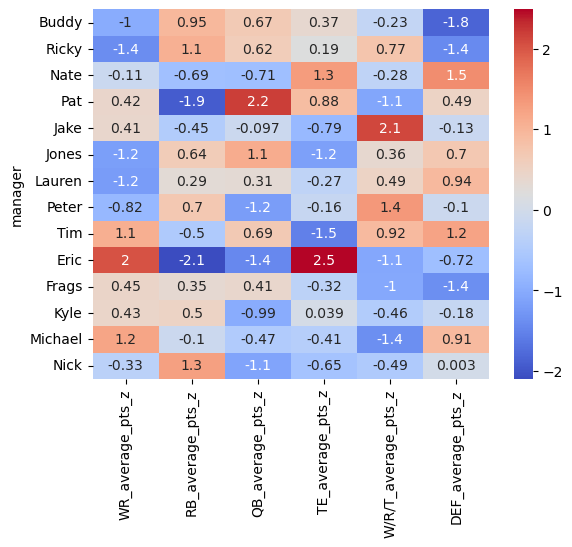

In [95]:
sns.heatmap(sc_df.drop('cluster', axis=1), cmap='coolwarm', annot=True);

In [97]:
ac = AgglomerativeClustering(4)

In [98]:
ac.fit(X_mean)

C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\mikem\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


AgglomerativeClustering(n_clusters=4)

In [104]:
pd.DataFrame(ac.labels_, index=X_mean.index).sort_values(0)

,0
manager,
Eric,0
Frags,0
Kyle,0
Michael,0
Nick,0
Nate,1
Pat,1
Jake,2
Jones,2


In [ ]:
pd.DataFrame